In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!pwd

/content


In [ ]:
from PIL import Image
import io

In [ ]:
print("Number of training flood images", len(os.listdir("/content/drive/MyDrive/Dataset/Train/Labeled/Flooded/image/")))
print("Number of training non-flood images", len(os.listdir("/content/drive/MyDrive/Dataset/Train/Labeled/Non-Flooded/image")))

Number of training flood images 51
Number of training non-flood images 347


In [ ]:
print("Number of unlabelled images", len(os.listdir("/content/drive/MyDrive/Dataset/Train/Unlabeled/image/")))

Number of unlabelled images 1047


In [ ]:
print("Number of Test images", len(os.listdir("/content/drive/MyDrive/Dataset/Test/image/")))

Number of Test images 448


In [ ]:
print("Number of Validation images", len(os.listdir("/content/drive/MyDrive/Dataset/Validation/image/")))

Number of Validation images 450


In [ ]:
train_dir = "/content/drive/MyDrive/Dataset/Train/Labeled"
test_dir = "/content/drive/MyDrive/Dataset/Test"
val_dir = "/content/drive/MyDrive/Dataset/Validation"

# SEQUENTIAL MODEL

## Data augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rotation_range = 30,
 zoom_range = 0.2,
 width_shift_range = 0.1,
 height_shift_range = 0.1,
 horizontal_flip = True,
 rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
batch_size = 16
training_set = train_datagen.flow_from_directory(train_dir,
 target_size = (64, 64),
 batch_size = batch_size,
 class_mode = "binary")

Found 796 images belonging to 2 classes.


In [ ]:
val_set = val_datagen.flow_from_directory(val_dir,
 target_size = (64, 64),
 batch_size = batch_size,
 class_mode = 'binary')

Found 450 images belonging to 1 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(test_dir,
 target_size = (64, 64),
 batch_size = batch_size,
 class_mode = 'binary')

Found 448 images belonging to 1 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
cnn = Sequential()

In [ ]:
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(64, 64, 3)))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=2, strides=2, padding='SAME'))
cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=2, strides=2, padding='SAME'))
cnn.add(Flatten())
cnn.add(Dense(64, activation='relu'))
cnn.add(Dropout(0.25))
cnn.add(Dense(1, activation='sigmoid'))

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 62, 62, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 29, 29, 64)       256       
 hNormalization)                                                 
                                                        

In [ ]:
from keras import losses
cnn.compile(optimizer = 'adam',
 loss = losses.BinaryCrossentropy(),
 metrics = ['acc'])
history = cnn.fit(training_set, validation_data = val_set, epochs = 10)

Epoch 1/10
50/50 [==============================] - 720s 14s/step - loss: 2.3234 - acc: 0.8040 - val_loss: 4.2052 - val_acc: 0.0000e+00
Epoch 2/10
50/50 [==============================] - 183s 4s/step - loss: 1.3711 - acc: 0.8405 - val_loss: 5.4792 - val_acc: 0.0022
Epoch 3/10
50/50 [==============================] - 173s 3s/step - loss: 1.5449 - acc: 0.8304 - val_loss: 3.1657 - val_acc: 0.1978
Epoch 4/10
50/50 [==============================] - 169s 3s/step - loss: 0.9091 - acc: 0.8568 - val_loss: 2.1864 - val_acc: 0.4667
Epoch 5/10
50/50 [==============================] - 180s 4s/step - loss: 0.6019 - acc: 0.8555 - val_loss: 2.6570 - val_acc: 0.3467
Epoch 6/10
50/50 [==============================] - 174s 4s/step - loss: 0.4741 - acc: 0.8568 - val_loss: 2.7604 - val_acc: 0.6311
Epoch 7/10
50/50 [==============================] - 173s 3s/step - loss: 0.4084 - acc: 0.8844 - val_loss: 6.4925 - val_acc: 0.3378
Epoch 8/10
50/50 [==============================] - 187s 4s/step - loss: 0.445

<Figure size 640x480 with 0 Axes>

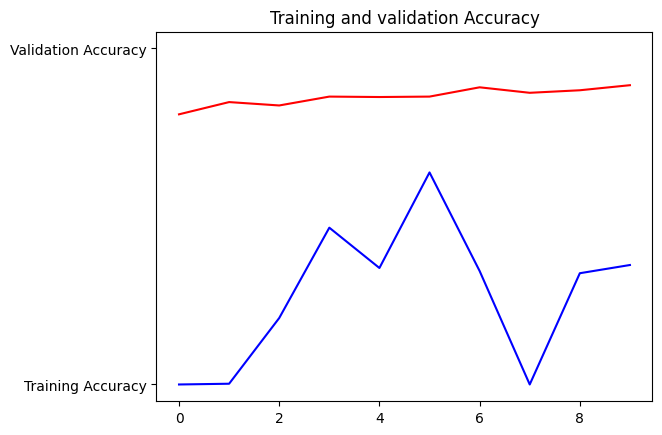

<Figure size 640x480 with 0 Axes>

In [ ]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation Accuracy')
plt.figure()


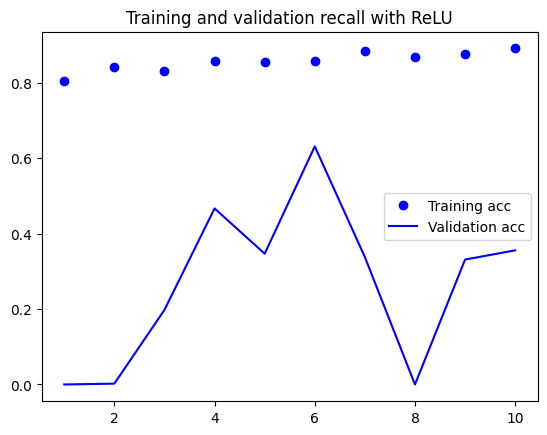

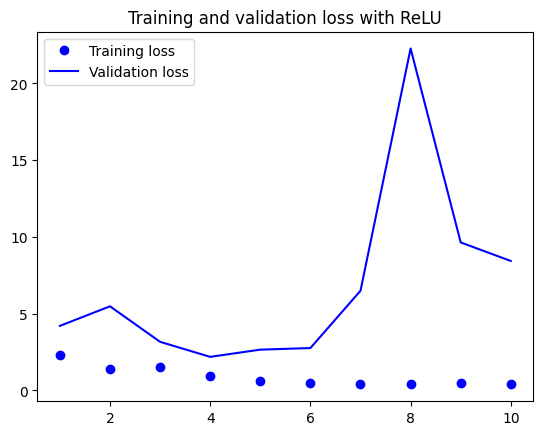

In [ ]:
#plot loss and accuracy for detection overfitting (50 epochs)
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation recall with ReLU')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss with ReLU')
plt.legend()

plt.show()

In [ ]:
import urllib.request
import os
import zipfile
import random
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.optimizers import RMSprop
from shutil import copyfile

# Data augmentation
(try adjusting the parameters)!

In [ ]:
# Experiment with your own parameters to reach 99.9% validation accuracy or better
train_datagen = ImageDataGenerator(rotation_range = 30,
 zoom_range = 0.2,
 width_shift_range = 0.1,
 height_shift_range = 0.1,
 horizontal_flip = True,
 rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
batch_size = 16
training_set = train_datagen.flow_from_directory(train_dir,
 target_size = (150, 150),
 batch_size = batch_size,
 class_mode = "binary")
val_set = val_datagen.flow_from_directory(val_dir,
 target_size = (150, 150),
 batch_size = batch_size,
 class_mode = 'binary')
test_set = test_datagen.flow_from_directory(test_dir,
 target_size = (150, 150),
 batch_size = batch_size,
 class_mode = 'binary')

Found 796 images belonging to 2 classes.
Found 450 images belonging to 1 classes.
Found 448 images belonging to 1 classes.


# Get and prepare the model: InceptionV3 model.

Since you're making use of transfer learning, you'll load the pre-trained weights of the model.
You'll also freeze the existing layers so that they aren't trained on your downstream task with the flood/non-flooded data.
You'll also get a reference to the last layer, 'mixed7' because you'll add some layers after this last layer.

In [ ]:
weights_url = "https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"
weights_file = "inception_v3.h5"
urllib.request.urlretrieve(weights_url, weights_file)

# Instantiate the model
pre_trained_model = InceptionV3(input_shape=(150, 150, 3),
                                include_top=False,
                                weights=None)

# load pre-trained weights
pre_trained_model.load_weights(weights_file)

# freeze the layers
for layer in pre_trained_model.layers:
    layer.trainable = False

# pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output


last layer output shape:  (None, 7, 7, 768)


# Add layers
Add some layers that you will train on the flooded/non-flooded data.

Flatten: This will take the output of the last_layer and flatten it to a vector.
Dense: You'll add a dense layer with a relu activation.
Dense: After that, add a dense layer with a sigmoid activation. The sigmoid will scale the output to range from 0 to 1, and allow you to interpret the output as a prediction between two categories (flooded/non flooded).
Then create the model object.

In [ ]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

model = Model(pre_trained_model.input, x)

# Train the model
Compile the model, and then train it on the test data using model.fit

Feel free to adjust the number of epochs. This project was originally designed with 20 epochs.
For the sake of time, you can use fewer epochs (2) to see how the code runs.
You can ignore the warnings about some of the images having corrupt EXIF data. Those will be skipped.

In [ ]:
# compile the model
model.compile(optimizer=RMSprop(lr=0.0001),
              loss='binary_crossentropy',
              metrics=['acc'])

# train the model (adjust the number of epochs from 1 to improve performance)
history = model.fit(training_set, validation_data = val_set,
            epochs=10,
            verbose=1)

Epoch 1/10
50/50 [==============================] - 1307s 26s/step - loss: 4.3040 - acc: 0.8015 - val_loss: 12.7851 - val_acc: 0.0689
Epoch 2/10
50/50 [==============================] - 182s 4s/step - loss: 1.9055 - acc: 0.8530 - val_loss: 8.8753 - val_acc: 0.0933
Epoch 3/10
50/50 [==============================] - 177s 4s/step - loss: 1.4896 - acc: 0.8568 - val_loss: 7.4393 - val_acc: 0.1000
Epoch 4/10
50/50 [==============================] - 177s 4s/step - loss: 0.8054 - acc: 0.9108 - val_loss: 1.8280 - val_acc: 0.4000
Epoch 5/10
50/50 [==============================] - 177s 4s/step - loss: 0.7862 - acc: 0.8857 - val_loss: 9.6766 - val_acc: 0.0867
Epoch 6/10
50/50 [==============================] - 176s 4s/step - loss: 0.5637 - acc: 0.9045 - val_loss: 4.1052 - val_acc: 0.1400
Epoch 7/10
50/50 [==============================] - 180s 4s/step - loss: 0.6003 - acc: 0.8970 - val_loss: 3.3313 - val_acc: 0.1333
Epoch 8/10
50/50 [==============================] - 181s 4s/step - loss: 0.3790 

### Visualize the training and validation accuracy

You can see how the training and validation accuracy change with each epoch on an x-y plot.

<Figure size 640x480 with 0 Axes>

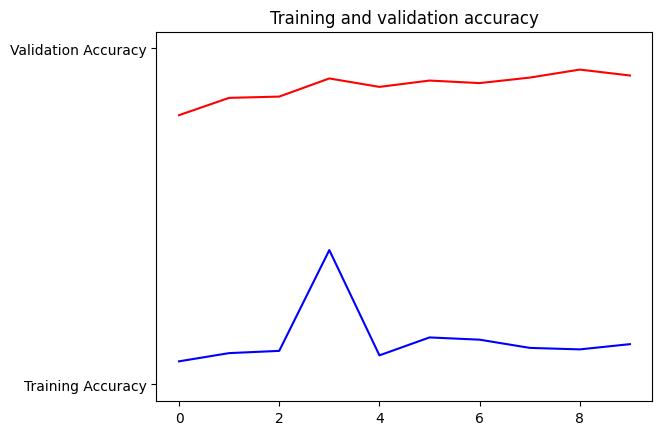

<Figure size 640x480 with 0 Axes>

In [ ]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

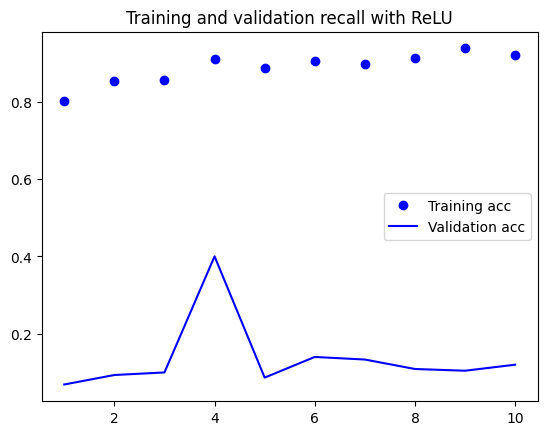

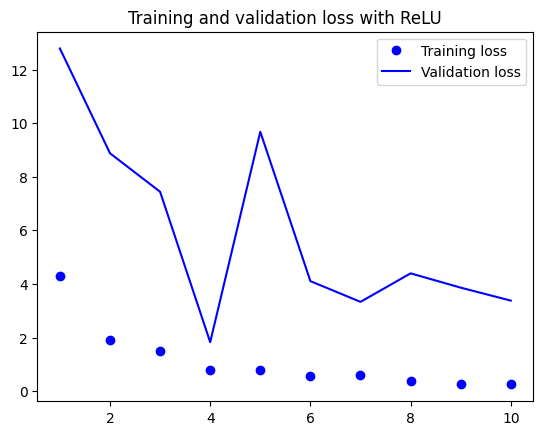

In [ ]:
#plot loss and accuracy for detection overfitting (50 epochs)
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation recall with ReLU')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss with ReLU')
plt.legend()

plt.show()

# Predict on a test image
You can upload any image and have the model predict whether it's flooded/non-flooded.

Find a flooded/ non-flooded image.
Run the following code cell. It will ask you to upload an image.
The model will print "flooded" or "non-flooded" depending on the model's prediction.

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import keras.utils as image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  image_tensor = np.vstack([x])
  classes = model.predict(image_tensor)
  print(classes)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is flooded")
  else:
    print(fn + " is not flooded")

Saving 10175.jpg to 10175.jpg
1/1 [==============================] - 0s 86ms/step
[[0.9999999]]
[0.9999999]
10175.jpg is flooded


In [ ]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_94 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_95 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_96 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
#process the jpeg image
#create an image generator
from keras.preprocessing.image import ImageDataGenerator

#normalize the image pixel value to be between 0 and 1
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                    '/content/drive/MyDrive/Dataset/Train',
                    target_size = (150,150),
                    batch_size = 16,
                    class_mode = 'binary')
validation_generator = test_datagen.flow_from_directory(
                    '/content/drive/MyDrive/Dataset/Validation',
                    target_size = (150,150),
                    batch_size = 16,
                    class_mode = 'binary')
val_set = val_datagen.flow_from_directory(val_dir,
 target_size = (64, 64),
 batch_size = batch_size,
 class_mode = 'binary')

Found 1843 images belonging to 2 classes.
Found 450 images belonging to 1 classes.
Found 450 images belonging to 1 classes.


In [ ]:
#compile the model with RMSprob with learning rate
from keras import optimizers
model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr=1e-4), metrics = ['acc'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
history = model.fit(
            training_set,
            steps_per_epoch= 10,
            epochs=10,
            validation_data=val_set,
            validation_steps=50)

Epoch 1/10
10/10 [==============================] - ETA: 0s - loss: 0.5280 - acc: 0.8438

InvalidArgumentError: ignored

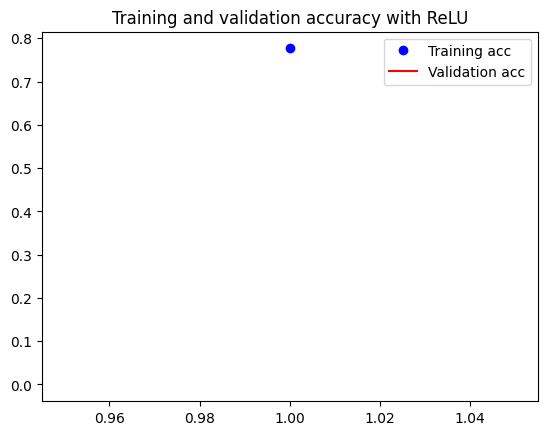

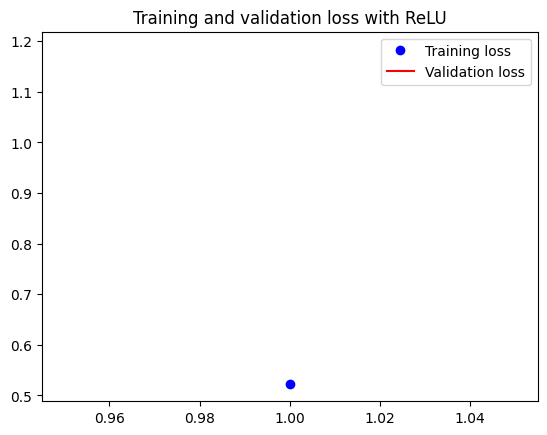

In [ ]:
#plot loss and accuracy for detection overfitting (30 epochs)
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy with ReLU')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss with ReLU')
plt.legend()

plt.show()

In [ ]:
it is generally a good practice to save the model after training
model.save('tomnod_1_50epochs.h5')

In [ ]:
#plot loss and accuracy for detection overfitting (50 epochs)
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy with ReLU')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss with ReLU')
plt.legend()

plt.show()

In [ ]:
#the accuracy stalls at about 95.5% and we start seeing overfitting
#we perform data augmentation
#to fight overfitting, we add a Dropout layer right before
#the densely connected layer
from keras import models
from keras import layers
from keras import optimizers
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
                optimizer = optimizers.RMSprop(lr = 1e-4),
                 metrics = ['acc'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
#train using data augmentation and dropout
train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 40,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255) #validation data should not be augmented
train_generator = train_datagen.flow_from_directory(
                    '/content/drive/MyDrive/Dataset/Train',
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')
validation_generator = test_datagen.flow_from_directory(
                    '/content/drive/MyDrive/Dataset/Validation',
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')
#train the model with fit_generator
history = model.fit_generator(
            train_generator,
            steps_per_epoch = 50,
            epochs = 10,
            validation_data = validation_generator,
            validation_steps = 50)

Found 1843 images belonging to 2 classes.
Found 450 images belonging to 1 classes.


<ipython-input-31-cd37d51746c4>:22: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
50/50 [==============================] - ETA: 0s - loss: 0.5881 - acc: 0.7360 

50/50 [==============================] - 929s 19s/step - loss: 0.5881 - acc: 0.7360 - val_loss: 1.4825 - val_acc: 0.0000e+00
Epoch 2/10
50/50 [==============================] - 304s 6s/step - loss: 0.4847 - acc: 0.7738
Epoch 3/10
50/50 [==============================] - 256s 5s/step - loss: 0.4776 - acc: 0.7788
Epoch 4/10
50/50 [==============================] - 249s 5s/step - loss: 0.4704 - acc: 0.7832
Epoch 5/10
50/50 [==============================] - 253s 5s/step - loss: 0.4752 - acc: 0.7782
Epoch 6/10
50/50 [==============================] - 248s 5s/step - loss: 0.4668 - acc: 0.7850
Epoch 7/10
50/50 [==============================] - 252s 5s/step - loss: 0.4636 - acc: 0.7851
Epoch 8/10
50/50 [==============================] - 252s 5s/step - loss: 0.4667 - acc: 0.7820
Epoch 9/10
50/50 [==============================] - 247s 5s/step - loss: 0.4648 - acc: 0.7845
Epoch 10/10
50/50 [==============================] - 238s 5s/step - loss: 0.4578 - acc: 0.7914


In [ ]:
#it is generally a good practice to save the model after training
model.save('tomnod_2_100epochs.h5')

In [ ]:
#plot loss and accuracy for detection overfitting
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy with data aug and dropout')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss with data aug and dropout')
plt.legend()

plt.show()

In [ ]:
#try again with Adam optimizer
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
                optimizer = optimizers.Adam(),
                 metrics = ['acc'])

#train using data augmentation and dropout
train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 40,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255) #validation data should not be augmented
train_generator = train_datagen.flow_from_directory(
                    '/home/ubuntu/train',
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')
validation_generator = test_datagen.flow_from_directory(
                    '/home/ubuntu/validation',
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')
#train the model with fit_generator
history = model.fit_generator(
            train_generator,
            steps_per_epoch = 100,
            epochs = 100,
            validation_data = validation_generator,
            validation_steps = 50)

In [ ]:
model.save('tomnod_2_100epochs_Adam.h5')

In [ ]:
#plot loss and accuracy for detection overfitting
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy with data aug and dropout (Adam)')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss with data aug and dropout (Adam)')
plt.legend()

plt.show()

In [ ]:
#to visualize the intermediate activation
from keras.models import load_model

In [ ]:
model1 = load_model('tomnod_1.h5')
model1.summary()

In [ ]:
img_path = '/home/ubuntu/damage/-96.960704_28.783292.jpeg'
from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size = (150,150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis = 0)
img_tensor /= 255.

print(img_tensor.shape)

In [ ]:
plt.imshow(img_tensor[0])
plt.show()

In [ ]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs = model.input, outputs = layer_outputs)

In [ ]:
activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0,:,:,4],cmap = 'viridis')

In [ ]:
second_layer_activation = activations[1]
plt.matshow(second_layer_activation[0,:,:,4],cmap = 'viridis')

In [ ]:
third_layer_activation = activations[2]
plt.matshow(third_layer_activation[0,:,:,4],cmap = 'viridis')

NameError: ignored

In [ ]:
layer_names =[]
for layer in model.layers[:8]:
    layer_names.append(layer.name)
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features//images_per_row
    display_grid = np.zeros((size*n_cols, images_per_row*size))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:,:,col*images_per_row+row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col*size:(col+1)*size,row*size:(row+1)*size] = channel_image
    scale = 1./size
    plt.figure(figsize=(scale*display_grid.shape[1],
                        scale*display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect = 'auto', cmap = 'viridis')

In [ ]:
plt.savefig('informationFlow-relu.png')

In [ ]:
#let's build a model with leaky ReLU
from keras.layers import LeakyReLU
from keras.regularizers import l2
model_l = models.Sequential()
model_l.add(layers.Conv2D(32,(3,3), input_shape = (150,150,3)))
model_l.add(LeakyReLU(alpha=0.1))
model_l.add(layers.MaxPooling2D((2,2)))
#model_l.add(Dropout(0.25))

model_l.add(layers.Conv2D(64,(3,3)))
model_l.add(LeakyReLU(alpha=0.1))
model_l.add(layers.MaxPooling2D((2,2)))
#model_l.add(Dropout(0.25))

model_l.add(layers.Conv2D(128,(3,3)))
model_l.add(LeakyReLU(alpha=0.1))
model_l.add(layers.MaxPooling2D((2,2)))
#model_l.add(Dropout(0.25))

model_l.add(layers.Conv2D(128,(3,3)))
model_l.add(LeakyReLU(alpha=0.1))
model_l.add(layers.MaxPooling2D((2,2)))
#model_l.add(Dropout(0.25))

model_l.add(layers.Flatten())
model_l.add(layers.Dense(512,W_regularizer = l2(1e-6)))
model_l.add(LeakyReLU(alpha=0.1))
model_l.add(layers.Dense(1, activation = 'sigmoid'))

In [ ]:
model_l.summary()

In [ ]:
#compile the model with RMSprob with learning rate
from keras import optimizers
model_l.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr=1e-4), metrics = ['acc'])

#process the jpeg image
#create an image generator
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                    '/home/ubuntu/train',
                    target_size = (150,150),
                    batch_size = 20,
                    class_mode = 'binary')
validation_generator = test_datagen.flow_from_directory(
                    '/home/ubuntu/validation',
                    target_size = (150,150),
                    batch_size = 20,
                    class_mode = 'binary')

#fit the model from image generator
history = model_l.fit_generator(
            train_generator,
            steps_per_epoch=100,
            epochs=30,
            validation_data=validation_generator,
            validation_steps=50)